#PROJECT
Name: Bhavana Biju<br>
Bracnch: ISE<br>
USN: 1CD24IS036<br>
Topic: Blood glucose level estimation from diet intake, insulin dosage, and activity level

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the uploaded file

In [199]:
df = pd.read_csv('/content/blood_glucose.csv')

The Data

In [200]:
df

,carb_intake_g,insulin_dosage_units,activity_level,time_since_meal_hours,medication_type,stress_level,sleep_hours,hydration_level,diabetes_type,body_mass_index,age,genetic_risk_score,glucose_level_mgdl
0,98.544851,33.153240,Vigorous,6.903038,Metformin,Medium,6.048549,Inadequate,Pre-diabetes,40.409136,41.0,Medium,238.322251
1,95.759835,23.901177,Vigorous,1.050308,Insulin,Medium,7.698804,Inadequate,Gestational,19.972059,33.0,Low,154.309089
2,147.679608,35.208679,Moderate,6.173139,NaN,Medium,5.974567,Inadequate,Type 2,26.263152,52.0,Medium,107.276738
3,66.574704,30.156287,Light,6.817482,Insulin,High,4.935384,Adequate,Gestational,29.283760,29.0,High,70.464152
4,65.745115,24.212904,Vigorous,6.714379,Metformin,Medium,4.003390,Inadequate,Gestational,26.354101,63.0,High,167.714513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,118.105407,NaN,Sedentary,7.281483,Metformin,High,5.058873,Adequate,Type 2,41.052162,59.0,Medium,215.984049
996,150.527888,33.913191,Vigorous,5.785405,Metformin,Medium,9.911228,Inadequate,Type 2,22.363884,47.0,High,292.819942
997,97.488950,6.062824,Moderate,5.713951,Insulin,Medium,6.707254,Adequate,Type 1,41.328792,53.0,NaN,200.648260
998,191.746887,46.562674,Sedentary,6.848062,NaN,Low,5.557005,Adequate,Type 1,40.045093,61.0,High,192.508667


Information of the file

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carb_intake_g          952 non-null    float64
 1   insulin_dosage_units   952 non-null    float64
 2   activity_level         947 non-null    object 
 3   time_since_meal_hours  952 non-null    float64
 4   medication_type        725 non-null    object 
 5   stress_level           955 non-null    object 
 6   sleep_hours            952 non-null    float64
 7   hydration_level        932 non-null    object 
 8   diabetes_type          959 non-null    object 
 9   body_mass_index        950 non-null    float64
 10  age                    954 non-null    float64
 11  genetic_risk_score     947 non-null    object 
 12  glucose_level_mgdl     949 non-null    float64
dtypes: float64(7), object(6)
memory usage: 101.7+ KB


Missing Data in file

In [202]:
df.isnull().sum()

,0
carb_intake_g,48
insulin_dosage_units,48
activity_level,53
time_since_meal_hours,48
medication_type,275
stress_level,45
sleep_hours,48
hydration_level,68
diabetes_type,41
body_mass_index,50


#DATA CLEANING
Numeric Data
1) carb_intake_g

In [203]:
df['carb_intake_g'].isna().sum()

np.int64(48)

replace missing values with mean

In [204]:
df['carb_intake_g'].fillna(df['carb_intake_g'].mean(), inplace=True)

/tmp/ipython-input-1824790173.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carb_intake_g'].fillna(df['carb_intake_g'].mean(), inplace=True)


In [205]:
df['carb_intake_g'].isna().sum()

np.int64(0)

2) insulin_dosage_units

In [206]:
df['insulin_dosage_units'].isna().sum()

np.int64(48)

replace missing values with median

In [207]:
df['insulin_dosage_units'].fillna(df['insulin_dosage_units'].median(), inplace=True)

/tmp/ipython-input-2191223322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['insulin_dosage_units'].fillna(df['insulin_dosage_units'].median(), inplace=True)


In [208]:
df['insulin_dosage_units'].isna().sum()

np.int64(0)

3) time_since_meal_hours

In [209]:
df['time_since_meal_hours'].isna().sum()

np.int64(48)

replace missing values with mode

In [210]:
df['time_since_meal_hours'].fillna(df['time_since_meal_hours'].mode(), inplace=True)

/tmp/ipython-input-3925067840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_since_meal_hours'].fillna(df['time_since_meal_hours'].mode(), inplace=True)


In [211]:
df['time_since_meal_hours'].isna().sum()

np.int64(0)

4) sleep_hours

In [212]:
df['sleep_hours'].isna().sum()

np.int64(48)


replace missing values with foward fill

In [213]:
df['sleep_hours'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-96559689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sleep_hours'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-96559689.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sleep_hours'].fillna(method='ffill', inplace=True)


In [214]:
df['sleep_hours'].isna().sum()

np.int64(0)

5) body_mass_index

In [215]:
df['body_mass_index'].isna().sum()

np.int64(50)

replace missing values with backward fill

In [216]:
df['body_mass_index'].fillna(method='bfill', inplace=True)

/tmp/ipython-input-172959241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body_mass_index'].fillna(method='bfill', inplace=True)
/tmp/ipython-input-172959241.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['body_mass_index'].fillna(method='bfill', inplace=True)


In [217]:
df['body_mass_index'].isna().sum()

np.int64(0)

6) age

In [218]:
df['age'].isna().sum()

np.int64(46)

replace missing values with median

In [219]:
df['age'].fillna(df['age'].median(), inplace=True)

/tmp/ipython-input-1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [220]:
df['age'].isna().sum()

np.int64(0)

7) glucose_level_mgdl

In [221]:
df['glucose_level_mgdl'].isna().sum()

np.int64(51)

replace missing values with KNN

In [222]:
from sklearn.impute import KNNImputer
# KNN imputation
knn_imputer = KNNImputer(n_neighbors=2)
knn_imputed_column = knn_imputer.fit_transform(df[['glucose_level_mgdl']])

df['glucose_level_mgdl'] = knn_imputed_column

In [223]:
df['glucose_level_mgdl'].isna().sum()

np.int64(0)

Non Numeric Data
1) activity_level

In [224]:
df['activity_level'].isna().sum()

np.int64(53)

In [225]:
df['activity_level'].value_counts()

,count
activity_level,
Vigorous,264
Moderate,251
Sedentary,225
Light,207


In [226]:
# Fill missing
df['activity_level'].fillna('Unknown', inplace=True)

# Standardize text
df['activity_level'] = df['activity_level'].str.strip().str.lower()

# Merge rare categories
counts = df['activity_level'].value_counts()
rare_labels = counts[counts < 2].index
df['activity_level'] = df['activity_level'].replace(rare_labels, 'other')

/tmp/ipython-input-2924107451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['activity_level'].fillna('Unknown', inplace=True)


In [227]:
df['activity_level'].isna().sum()

np.int64(0)

 2) medication_type


In [228]:
df['medication_type'].isna().sum()

np.int64(275)

In [229]:
df['medication_type'].value_counts()

,count
medication_type,
Sulfonylurea,255
Metformin,236
Insulin,234


In [230]:
# Fill missing
df['medication_type'].fillna('Unknown', inplace=True)

# Standardize text
df['medication_type'] = df['medication_type'].str.strip().str.lower()

# Merge rare categories
counts = df['medication_type'].value_counts()
rare_labels = counts[counts < 2].index
df['medication_type'] = df['medication_type'].replace(rare_labels, 'other')

/tmp/ipython-input-2362324262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['medication_type'].fillna('Unknown', inplace=True)


In [231]:
df['medication_type'].isna().sum()

np.int64(0)

 3) stress_level


In [232]:
df['stress_level'].isna().sum()

np.int64(45)

In [233]:
df['stress_level'].value_counts()

,count
stress_level,
Medium,349
High,305
Low,301


In [234]:
# Fill missing
df['stress_level'].fillna('Unknown', inplace=True)

# Standardize text
df['stress_level'] = df['stress_level'].str.strip().str.lower()

# Merge rare categories
counts = df['stress_level'].value_counts()
rare_labels = counts[counts < 2].index
df['stress_level'] = df['stress_level'].replace(rare_labels, 'other')

/tmp/ipython-input-3732985545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stress_level'].fillna('Unknown', inplace=True)


In [235]:
df['stress_level'].value_counts()

,count
stress_level,
medium,349
high,305
low,301
unknown,45


In [236]:
df['stress_level'].isna().sum()

np.int64(0)

 4) hydration_level


In [237]:
df['hydration_level'].isna().sum()

np.int64(68)

In [238]:
df['hydration_level'].value_counts()

,count
hydration_level,
Adequate,492
Inadequate,440


In [239]:
# Fill missing
df['hydration_level'].fillna('Unknown', inplace=True)

# Standardize text
df['hydration_level'] = df['hydration_level'].str.strip().str.lower()

# Merge rare categories
counts = df['hydration_level'].value_counts()
rare_labels = counts[counts < 2].index
df['hydration_level'] = df['hydration_level'].replace(rare_labels, 'other')

/tmp/ipython-input-1763773182.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hydration_level'].fillna('Unknown', inplace=True)


In [240]:
df['hydration_level'].value_counts()

,count
hydration_level,
adequate,492
inadequate,440
unknown,68


In [241]:
df['hydration_level'].isna().sum()

np.int64(0)

 5) diabetes_type


In [242]:
df['diabetes_type'].isna().sum()

np.int64(41)

In [243]:
df['diabetes_type'].value_counts()

,count
diabetes_type,
Type 2,271
Gestational,240
Type 1,240
Pre-diabetes,208


In [244]:
# Fill missing
df['diabetes_type'].fillna('Unknown', inplace=True)

# Standardize text
df['diabetes_type'] = df['diabetes_type'].str.strip().str.lower()

# Merge rare categories
counts = df['diabetes_type'].value_counts()
rare_labels = counts[counts < 2].index
df['diabetes_type'] = df['diabetes_type'].replace(rare_labels, 'other')

/tmp/ipython-input-2104331057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diabetes_type'].fillna('Unknown', inplace=True)


In [245]:
df['diabetes_type'].value_counts()

,count
diabetes_type,
type 2,271
type 1,240
gestational,240
pre-diabetes,208
unknown,41


In [246]:
df['diabetes_type'].isna().sum()

np.int64(0)

 6) genetic_risk_score

In [247]:
df['genetic_risk_score'].isna().sum()

np.int64(53)

In [248]:
df['genetic_risk_score'].value_counts()

,count
genetic_risk_score,
Low,326
Medium,323
High,298


In [249]:
# Fill missing
df['genetic_risk_score'].fillna('Unknown', inplace=True)

# Standardize text
df['genetic_risk_score'] = df['genetic_risk_score'].str.strip().str.lower()

# Merge rare categories
counts = df['genetic_risk_score'].value_counts()
rare_labels = counts[counts < 2].index
df['genetic_risk_score'] = df['genetic_risk_score'].replace(rare_labels, 'other')

/tmp/ipython-input-3442172497.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genetic_risk_score'].fillna('Unknown', inplace=True)


In [250]:
df['genetic_risk_score'].value_counts()

,count
genetic_risk_score,
low,326
medium,323
high,298
unknown,53


In [251]:
df['genetic_risk_score'].isna().sum()

np.int64(0)

In [252]:
df.isnull().sum()

,0
carb_intake_g,0
insulin_dosage_units,0
activity_level,0
time_since_meal_hours,0
medication_type,0
stress_level,0
sleep_hours,0
hydration_level,0
diabetes_type,0
body_mass_index,0


In [253]:
df.head(30)

,carb_intake_g,insulin_dosage_units,activity_level,time_since_meal_hours,medication_type,stress_level,sleep_hours,hydration_level,diabetes_type,body_mass_index,age,genetic_risk_score,glucose_level_mgdl
0,98.544851,33.153240,vigorous,6.903038,metformin,medium,6.048549,inadequate,pre-diabetes,40.409136,41.0,medium,238.322251
1,95.759835,23.901177,vigorous,1.050308,insulin,medium,7.698804,inadequate,gestational,19.972059,33.0,low,154.309089
2,147.679608,35.208679,moderate,6.173139,unknown,medium,5.974567,inadequate,type 2,26.263152,52.0,medium,107.276738
3,66.574704,30.156287,light,6.817482,insulin,high,4.935384,adequate,gestational,29.283760,29.0,high,70.464152
4,65.745115,24.212904,vigorous,6.714379,metformin,medium,4.003390,inadequate,gestational,26.354101,63.0,high,167.714513
5,94.070892,17.292708,unknown,2.539663,unknown,medium,8.488332,inadequate,pre-diabetes,20.154097,60.0,medium,185.835735
6,101.148632,40.989257,sedentary,2.120028,unknown,medium,6.713882,adequate,type 2,30.144008,57.0,medium,173.058896
7,43.941834,22.020625,moderate,2.896812,insulin,medium,9.072601,adequate,gestational,23.985618,39.0,unknown,154.373620
8,119.221165,38.851104,light,2.904026,insulin,low,8.823657,adequate,gestational,34.030845,61.0,high,237.223244
9,17.171061,30.209166,moderate,4.005620,sulfonylurea,medium,4.216787,adequate,pre-diabetes,40.517483,79.0,low,91.672253


Cleaning of data done <br>
x-x-x-x-x-x-x-x-x-x-x-x

#GRAPHING AND COMPARING DATA



Histograms

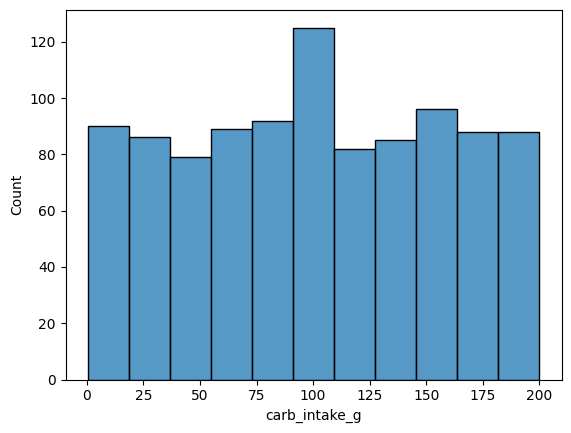

In [254]:
sns.histplot(df['carb_intake_g'])
plt.show()

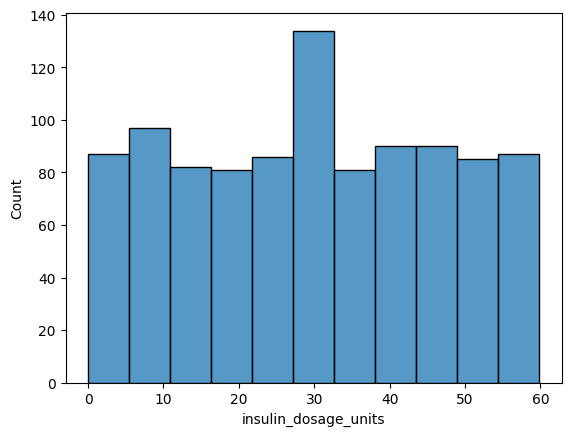

In [255]:
sns.histplot(df['insulin_dosage_units'])
plt.show()

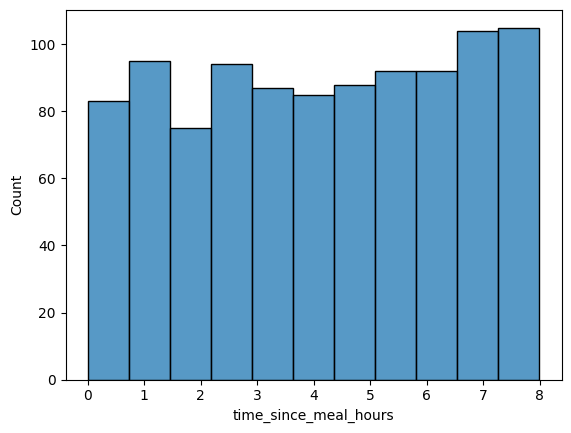

In [256]:
sns.histplot(df['time_since_meal_hours'])
plt.show()

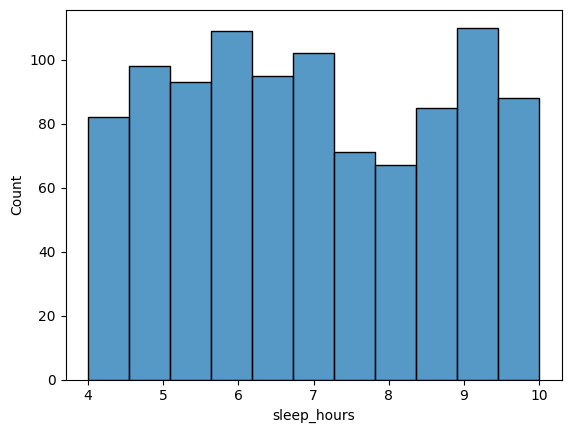

In [257]:
sns.histplot(df['sleep_hours'])
plt.show()

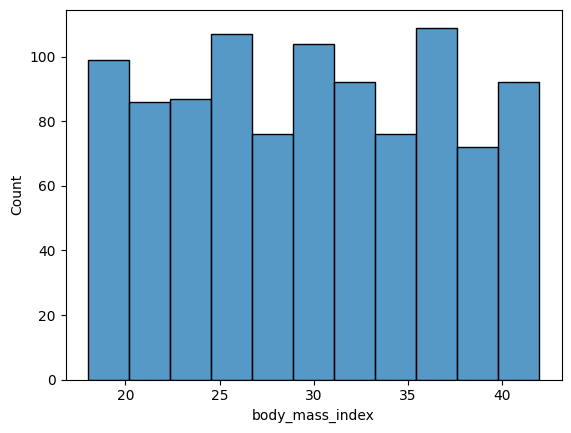

In [258]:
sns.histplot(df['body_mass_index'])
plt.show()

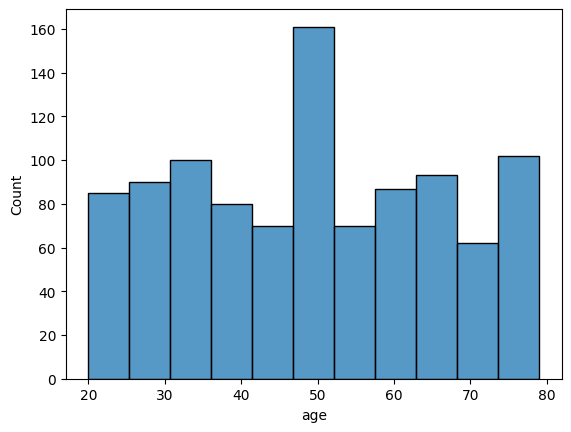

In [259]:
sns.histplot(df['age'])
plt.show()

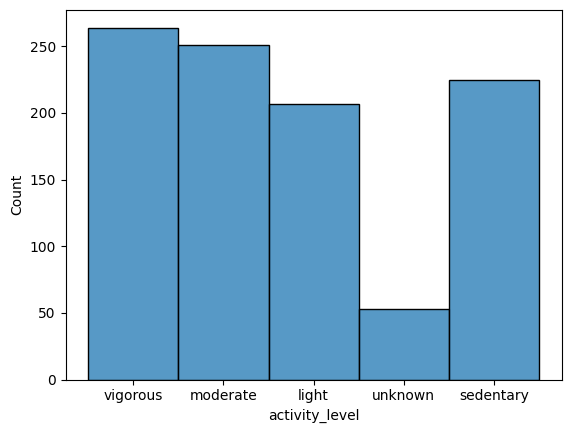

In [260]:
sns.histplot(df['activity_level'])
plt.show()

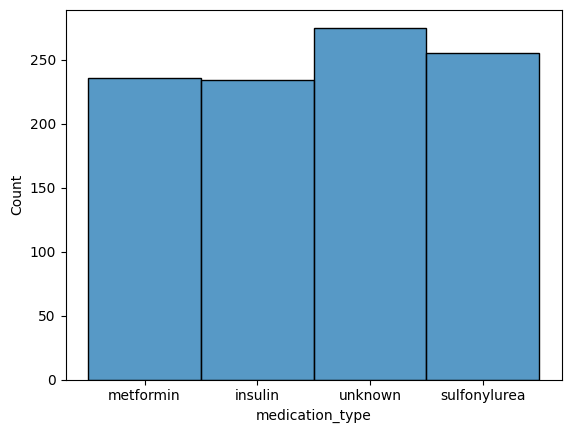

In [261]:
sns.histplot(df['medication_type'])
plt.show()

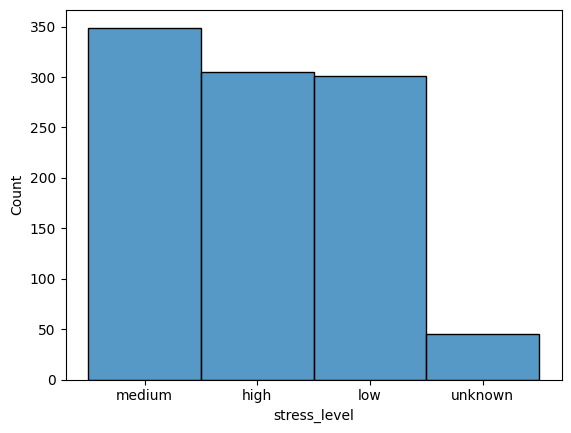

In [262]:
sns.histplot(df['stress_level'])
plt.show()

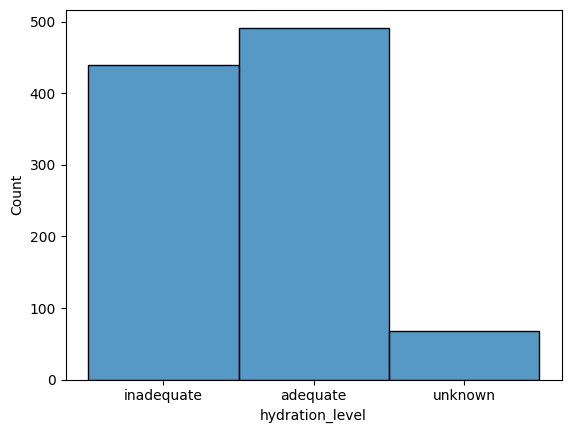

In [263]:
sns.histplot(df['hydration_level'])
plt.show()

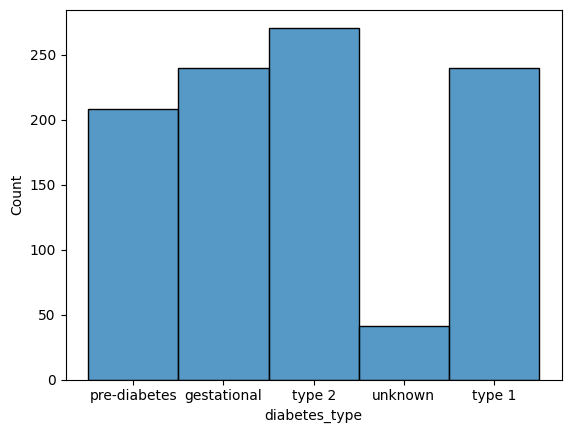

In [264]:
sns.histplot(df['diabetes_type'])
plt.show()

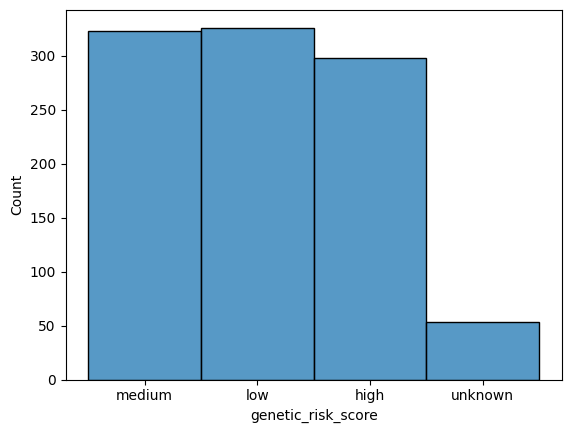

In [265]:
sns.histplot(df['genetic_risk_score'])
plt.show()

Scatter plot

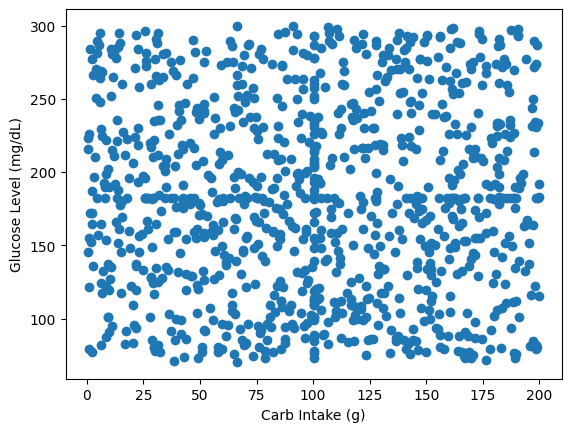

In [266]:
plt.scatter(df['carb_intake_g'], df['glucose_level_mgdl'])
plt.xlabel("Carb Intake (g)")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

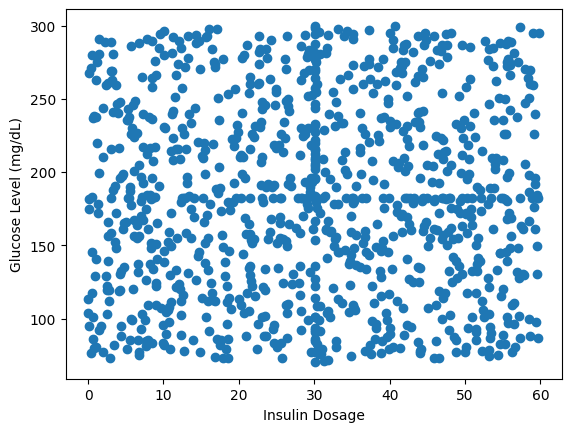

In [267]:
plt.scatter(df['insulin_dosage_units'], df['glucose_level_mgdl'])
plt.xlabel("Insulin Dosage")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

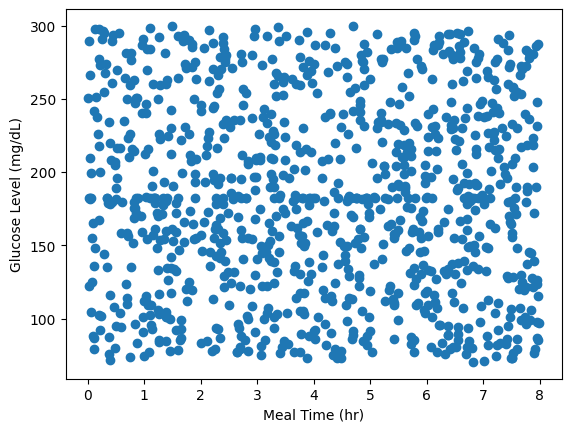

In [268]:
plt.scatter(df['time_since_meal_hours'], df['glucose_level_mgdl'])
plt.xlabel("Meal Time (hr)")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

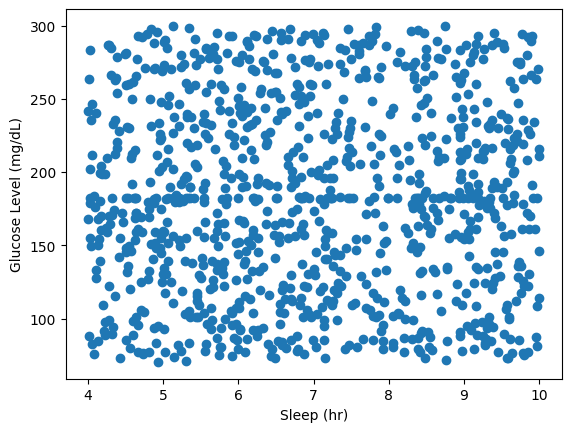

In [269]:
plt.scatter(df['sleep_hours'], df['glucose_level_mgdl'])
plt.xlabel("Sleep (hr)")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

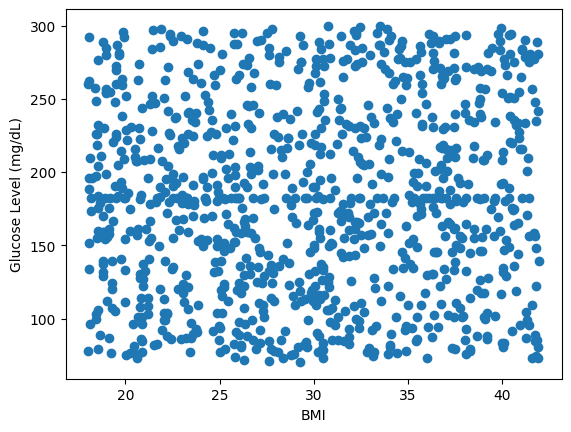

In [270]:
plt.scatter(df['body_mass_index'], df['glucose_level_mgdl'])
plt.xlabel("BMI")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

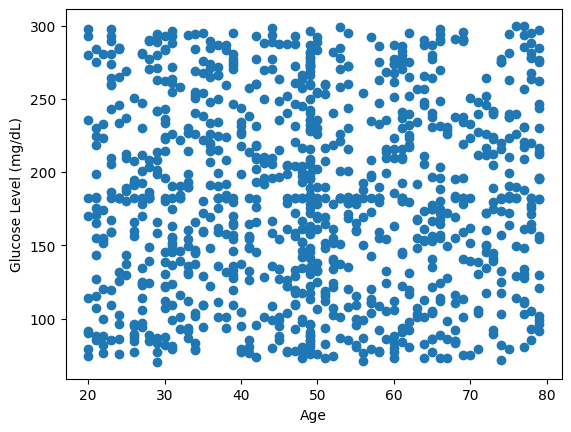

In [271]:
plt.scatter(df['age'], df['glucose_level_mgdl'])
plt.xlabel("Age")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

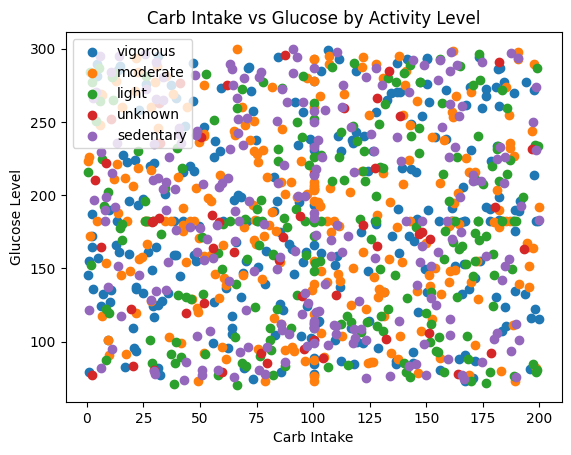

In [272]:
for level in df['activity_level'].unique():
    subset = df[df['activity_level'] == level]
    plt.scatter(subset['carb_intake_g'], subset['glucose_level_mgdl'], label=level)

plt.xlabel("Carb Intake")
plt.ylabel("Glucose Level")
plt.legend()
plt.title("Carb Intake vs Glucose by Activity Level")
plt.show()

Boxplot

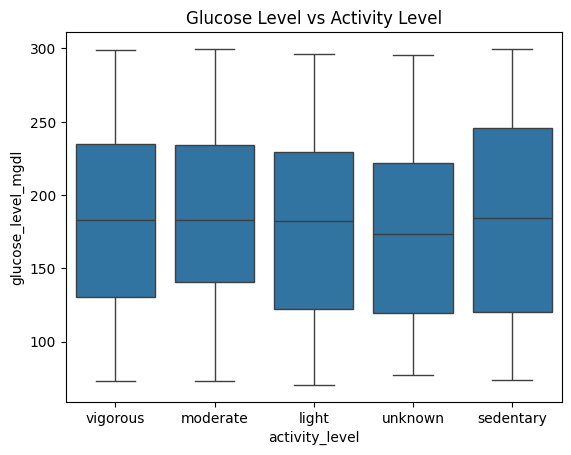

In [273]:
sns.boxplot(x=df['activity_level'], y=df_eda['glucose_level_mgdl'])
plt.title("Glucose Level vs Activity Level")
plt.show()

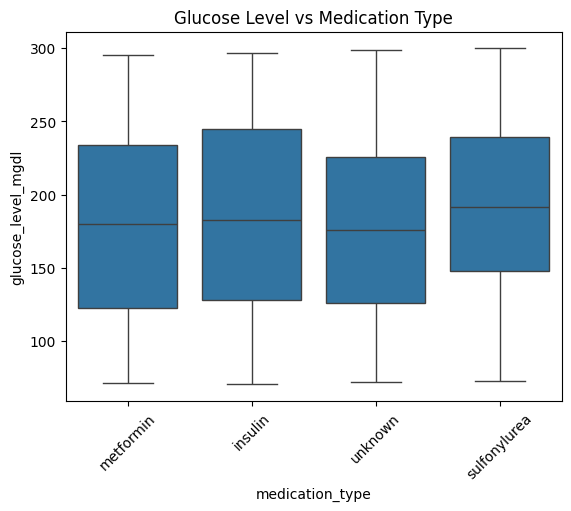

In [274]:
sns.boxplot(x='medication_type', y='glucose_level_mgdl', data=df)
plt.title("Glucose Level vs Medication Type")
plt.xticks(rotation=45)
plt.show()

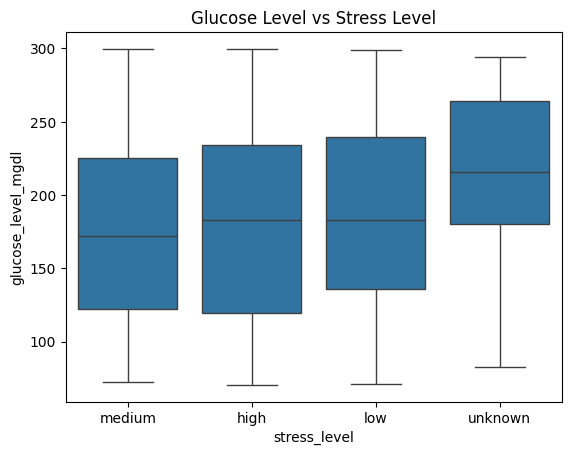

In [275]:
sns.boxplot(x='stress_level', y='glucose_level_mgdl', data=df)
plt.title("Glucose Level vs Stress Level")
plt.show()

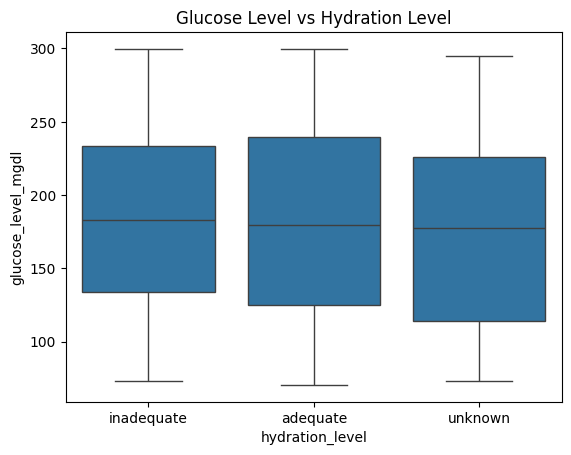

In [276]:
sns.boxplot(x='hydration_level', y='glucose_level_mgdl', data=df)
plt.title("Glucose Level vs Hydration Level")
plt.show()

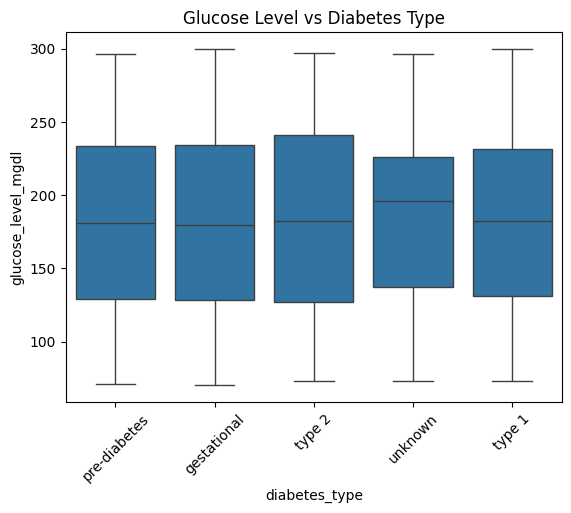

In [277]:
sns.boxplot(x='diabetes_type', y='glucose_level_mgdl', data=df)
plt.title("Glucose Level vs Diabetes Type")
plt.xticks(rotation=45)
plt.show()

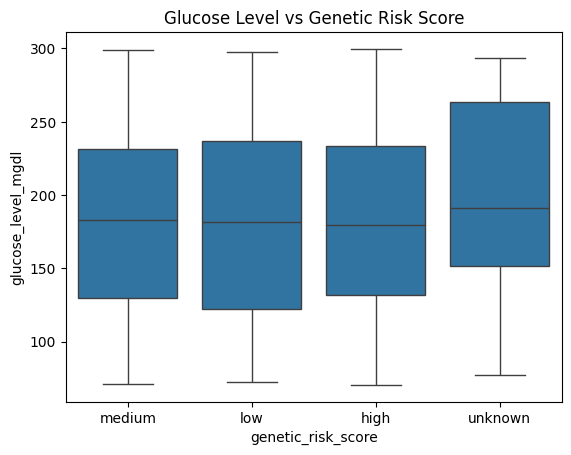

In [278]:
sns.boxplot(x='genetic_risk_score', y='glucose_level_mgdl', data=df)
plt.title("Glucose Level vs Genetic Risk Score")
plt.show()


Barplot

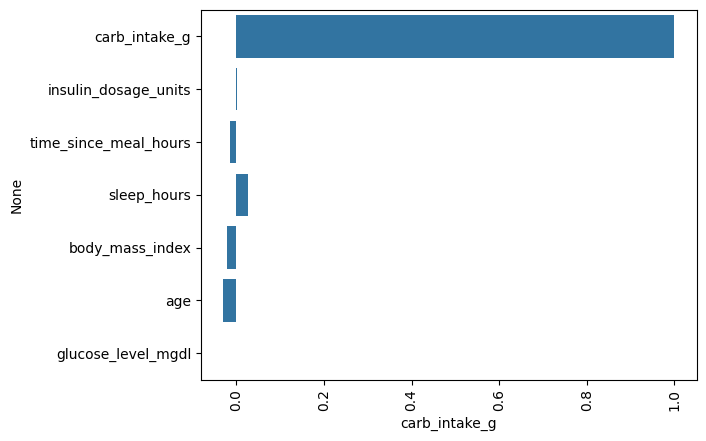

In [279]:
sns.barplot(x=df.corr(numeric_only=True)['carb_intake_g'],
            y=df.corr(numeric_only=True)['carb_intake_g'].index)
plt.xticks(rotation=90)
plt.show()

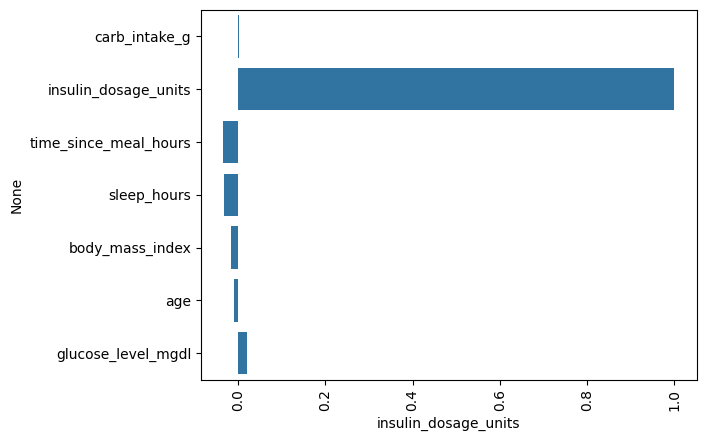

In [280]:
sns.barplot(x=df.corr(numeric_only=True)['insulin_dosage_units'],
            y=df.corr(numeric_only=True)['insulin_dosage_units'].index)
plt.xticks(rotation=90)
plt.show()

Categorical vs Numerical Plots

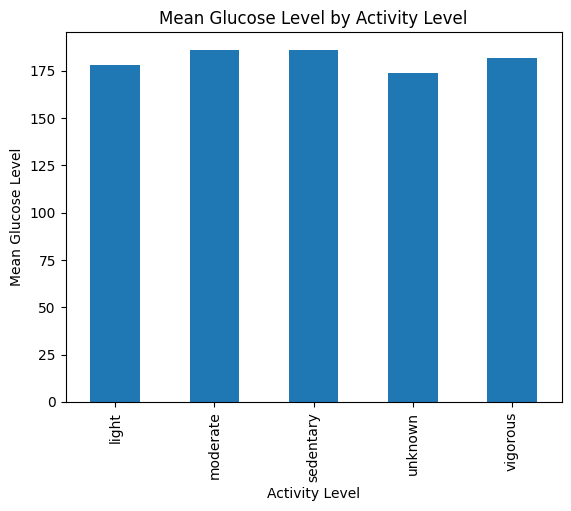

In [281]:
df.groupby('activity_level')['glucose_level_mgdl'].mean().plot(kind='bar')
plt.xlabel("Activity Level")
plt.ylabel("Mean Glucose Level")
plt.title("Mean Glucose Level by Activity Level")
plt.show()

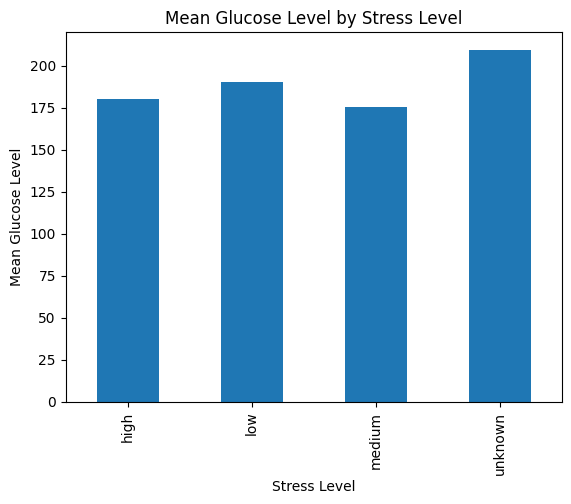

In [282]:
df.groupby('stress_level')['glucose_level_mgdl'].mean().plot(kind='bar')
plt.xlabel("Stress Level")
plt.ylabel("Mean Glucose Level")
plt.title("Mean Glucose Level by Stress Level")
plt.show()

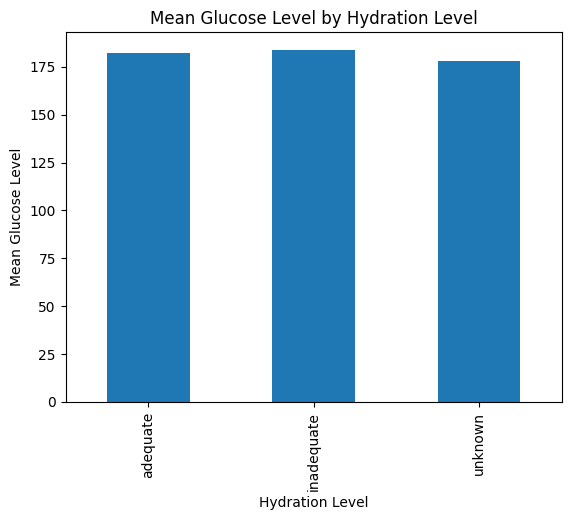

In [283]:
df.groupby('hydration_level')['glucose_level_mgdl'].mean().plot(kind='bar')
plt.xlabel("Hydration Level")
plt.ylabel("Mean Glucose Level")
plt.title("Mean Glucose Level by Hydration Level")
plt.show()

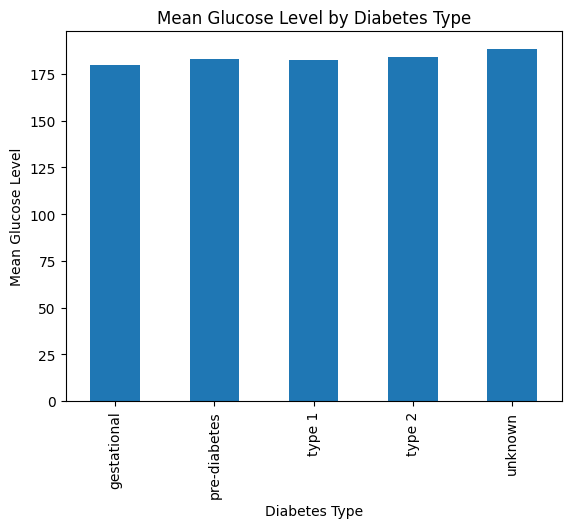

In [284]:
df.groupby('diabetes_type')['glucose_level_mgdl'].mean().plot(kind='bar')
plt.xlabel("Diabetes Type")
plt.ylabel("Mean Glucose Level")
plt.title("Mean Glucose Level by Diabetes Type")
plt.show()

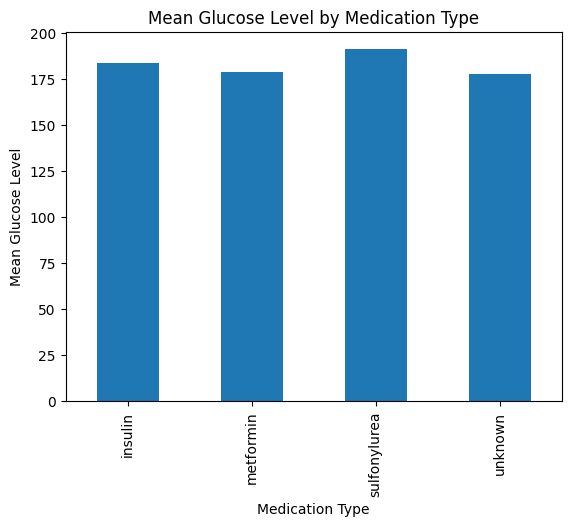

In [285]:
df.groupby('medication_type')['glucose_level_mgdl'].mean().plot(kind='bar')
plt.xlabel("Medication Type")
plt.ylabel("Mean Glucose Level")
plt.title("Mean Glucose Level by Medication Type")
plt.show()

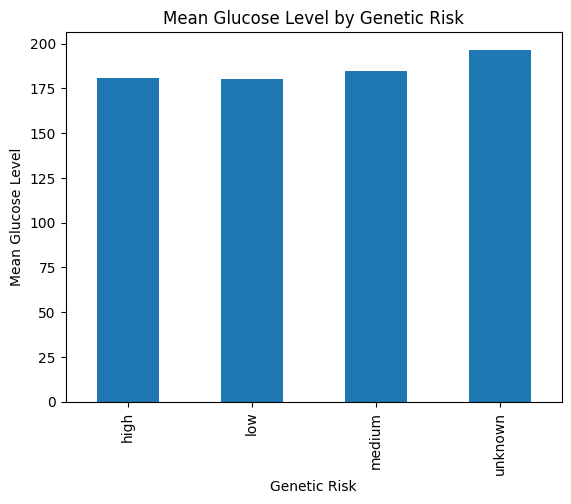

In [286]:
df.groupby('genetic_risk_score')['glucose_level_mgdl'].mean().plot(kind='bar')
plt.xlabel("Genetic Risk")
plt.ylabel("Mean Glucose Level")
plt.title("Mean Glucose Level by Genetic Risk")
plt.show()

Heatmap

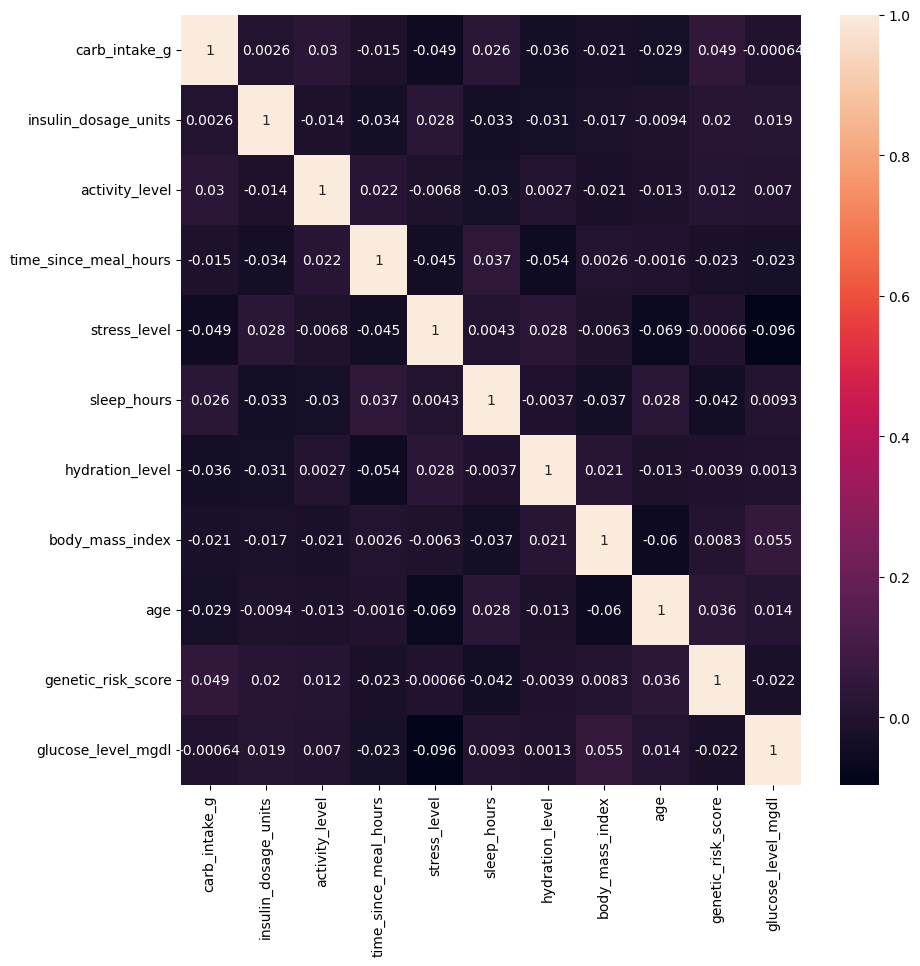

In [287]:
plt.figure(figsize=(10, 10))

sns.heatmap(df_eda.corr(numeric_only=True), annot=True)
plt.show()

Converting ordinal data to numeric data by giving each a rank

In [288]:
activity_map = {'sedentary': 0, 'light': 1, 'moderate': 2, 'vigorous': 3, 'unknown': -1}
stress_map = {'low': 0, 'medium': 1, 'high': 2, 'unknown': -1}
hydration_map = {'inadequate': 0, 'adequate': 1, 'unknown': -1}
genetic_map = {'low': 0, 'medium': 1, 'high': 2, 'unknown': -1}

In [289]:
df['activity_level'] = df['activity_level'].map(activity_map)
df['stress_level'] = df['stress_level'].map(stress_map)
df['hydration_level'] = df['hydration_level'].map(hydration_map)
df['genetic_risk_score'] = df['genetic_risk_score'].map(genetic_map)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carb_intake_g          1000 non-null   float64
 1   insulin_dosage_units   1000 non-null   float64
 2   activity_level         1000 non-null   int64  
 3   time_since_meal_hours  1000 non-null   float64
 4   medication_type        1000 non-null   object 
 5   stress_level           1000 non-null   int64  
 6   sleep_hours            1000 non-null   float64
 7   hydration_level        1000 non-null   int64  
 8   diabetes_type          1000 non-null   object 
 9   body_mass_index        1000 non-null   float64
 10  age                    1000 non-null   float64
 11  genetic_risk_score     1000 non-null   int64  
 12  glucose_level_mgdl     1000 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage: 101.7+ KB


One Hot Encoding for nominal data

In [291]:
df = pd.get_dummies(df, columns=['medication_type', 'diabetes_type'], drop_first=True)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   carb_intake_g                 1000 non-null   float64
 1   insulin_dosage_units          1000 non-null   float64
 2   activity_level                1000 non-null   int64  
 3   time_since_meal_hours         1000 non-null   float64
 4   stress_level                  1000 non-null   int64  
 5   sleep_hours                   1000 non-null   float64
 6   hydration_level               1000 non-null   int64  
 7   body_mass_index               1000 non-null   float64
 8   age                           1000 non-null   float64
 9   genetic_risk_score            1000 non-null   int64  
 10  glucose_level_mgdl            1000 non-null   float64
 11  medication_type_metformin     1000 non-null   bool   
 12  medication_type_sulfonylurea  1000 non-null   bool   
 13  medi

#BUILDING REGRESSION MODEL

In [293]:
X = df[['carb_intake_g', 'insulin_dosage_units', 'activity_level']]
y = df['glucose_level_mgdl']

In [294]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Linear Regression<br>
Linear Regression is the simplest regression model.
It assumes a straight-line relationship between inputs and output.<br>
Idea<br>
𝑦 = 𝑏0 + 𝑏1𝑥1 + 𝑏2𝑥2 + ... + 𝑏𝑛𝑥𝑛

Blood glucose = a × carb intake + b × insulin dose + c × activity level + constant<br><br>

How it works

Finds the best-fit straight line

Minimizes the error between predicted and actual values

Uses least squares method

In [295]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression Results
MAE: 54.91374216929583
MSE: 4181.971509535597
RMSE: 64.66816457528076
R²: -0.0051813347840128365


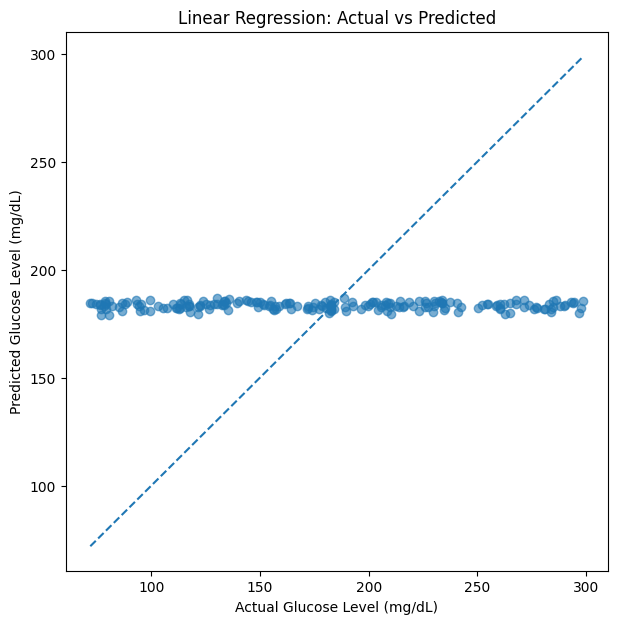

In [296]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)

plt.xlabel("Actual Glucose Level (mg/dL)")
plt.ylabel("Predicted Glucose Level (mg/dL)")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

Random Forest Regressor<br>
Random Forest is an ensemble model that combines many decision trees.<br><br>
How it works

Creates many decision trees

Each tree:

Uses a random subset of data

Uses random features

Final prediction = average of all trees

In [297]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Results
MAE: 55.8399736441478
MSE: 4509.071856192333
RMSE: 67.14962290431967
R²: -0.08380338237831686


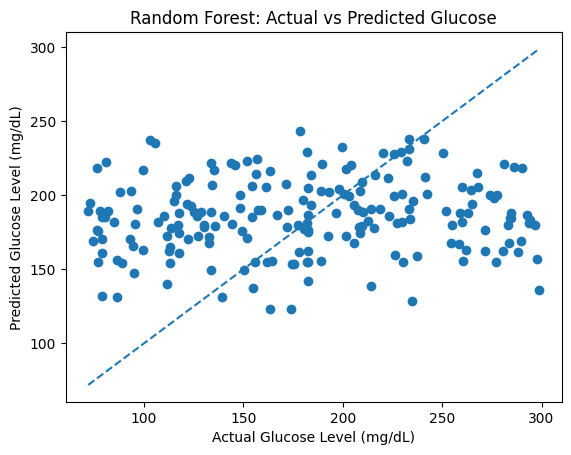

In [298]:
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Glucose Level (mg/dL)")
plt.ylabel("Predicted Glucose Level (mg/dL)")
plt.title("Random Forest: Actual vs Predicted Glucose")
plt.show()

Gradient Boosting Regressor<br>
Gradient Boosting builds trees sequentially, not independently.<br><br>
How it works

Start with a weak model

Compute prediction errors

Next model learns only those errors

Repeat many times

Combine all models

In [299]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: -0.09396891317556788
MAE: 55.95397158928718


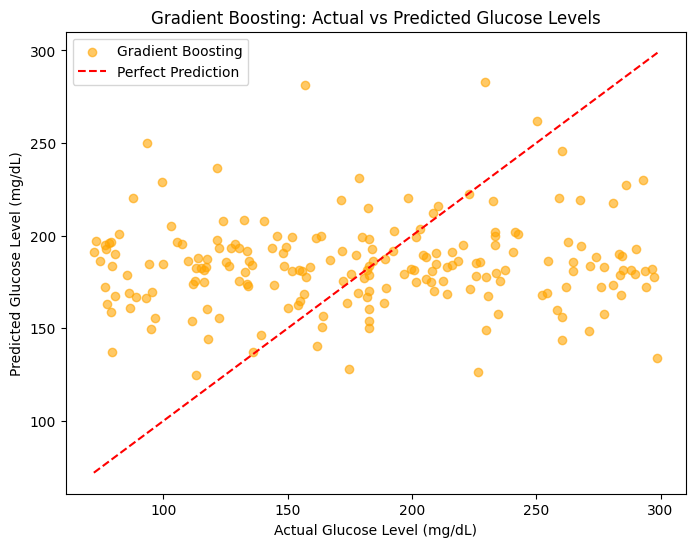

In [300]:
import matplotlib.pyplot as plt

# Predictions from Gradient Boosting
y_pred_gbr = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, color='orange', label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Glucose Level (mg/dL)")
plt.ylabel("Predicted Glucose Level (mg/dL)")
plt.title("Gradient Boosting: Actual vs Predicted Glucose Levels")
plt.legend()
plt.show()
